In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('btc-eth-prices-outliers.csv', parse_dates=True, index_col='Timestamp')
df

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


<Axes: xlabel='Timestamp'>

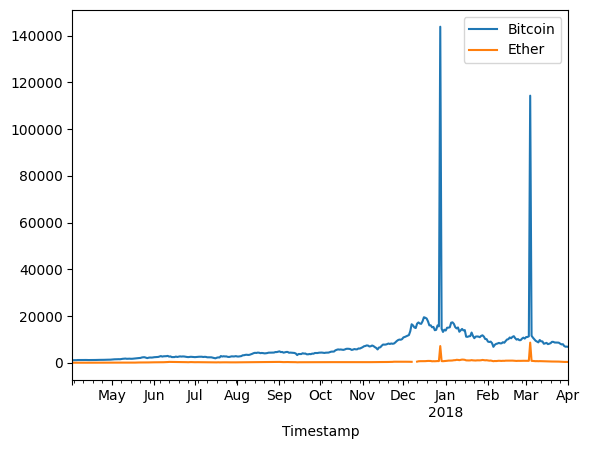

In [4]:
df.plot()

<Axes: xlabel='Timestamp'>

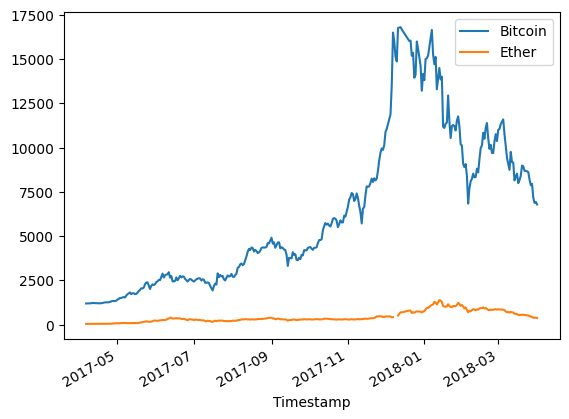

In [8]:
df_new = df[
    (df['Bitcoin'] >= df['Bitcoin'].quantile(0.025)) &
    (df['Bitcoin'] <= df['Bitcoin'].quantile(0.975))
]
df_new.plot()

Text(0.5, 1.0, 'Bitcoin $ Ether Price throught time')

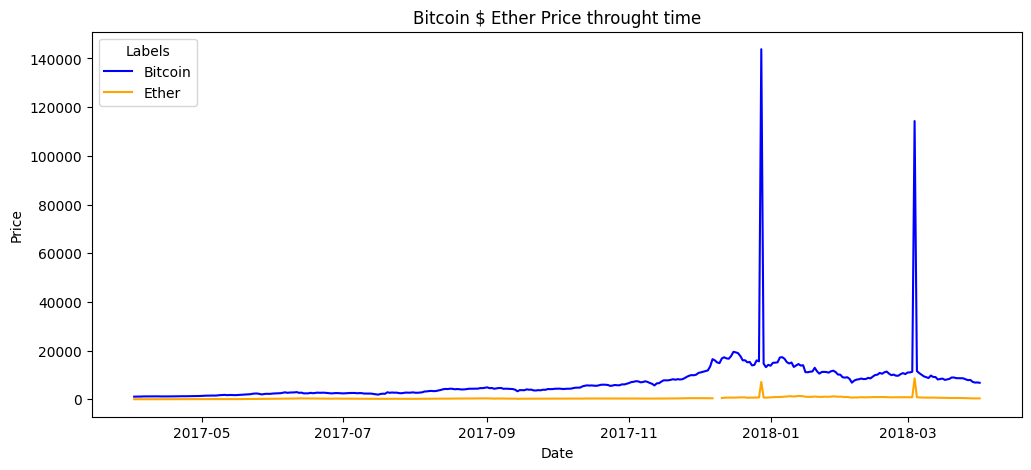

In [24]:
fig,ax = plt.subplots(figsize = (12,5))
ax.plot(df['Bitcoin'], color='blue', label='Bitcoin')
ax.plot(df['Ether'], color='orange', label='Ether')
ax.legend(title='Labels', loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Bitcoin $ Ether Price throught time')

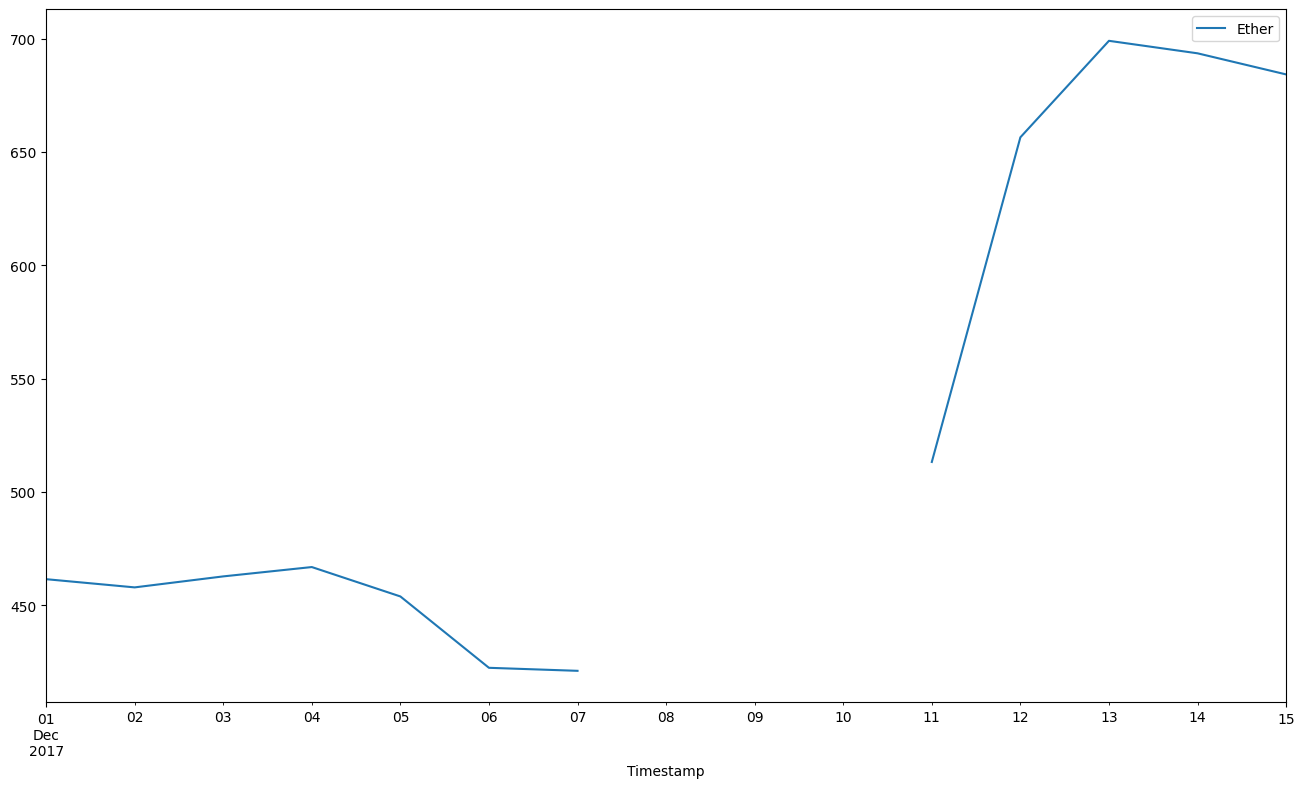

In [28]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))
df_na= df.loc['2017-12': '2017-12-15']

In [29]:
# Are those null values?
df_na['Ether'].isna().values.any()

True

In [30]:
# when? what periods of time?
df_na[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [31]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [32]:
df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13940\348566796.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [33]:
df.fillna(method='bfill', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13940\3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


<Axes: xlabel='Timestamp'>

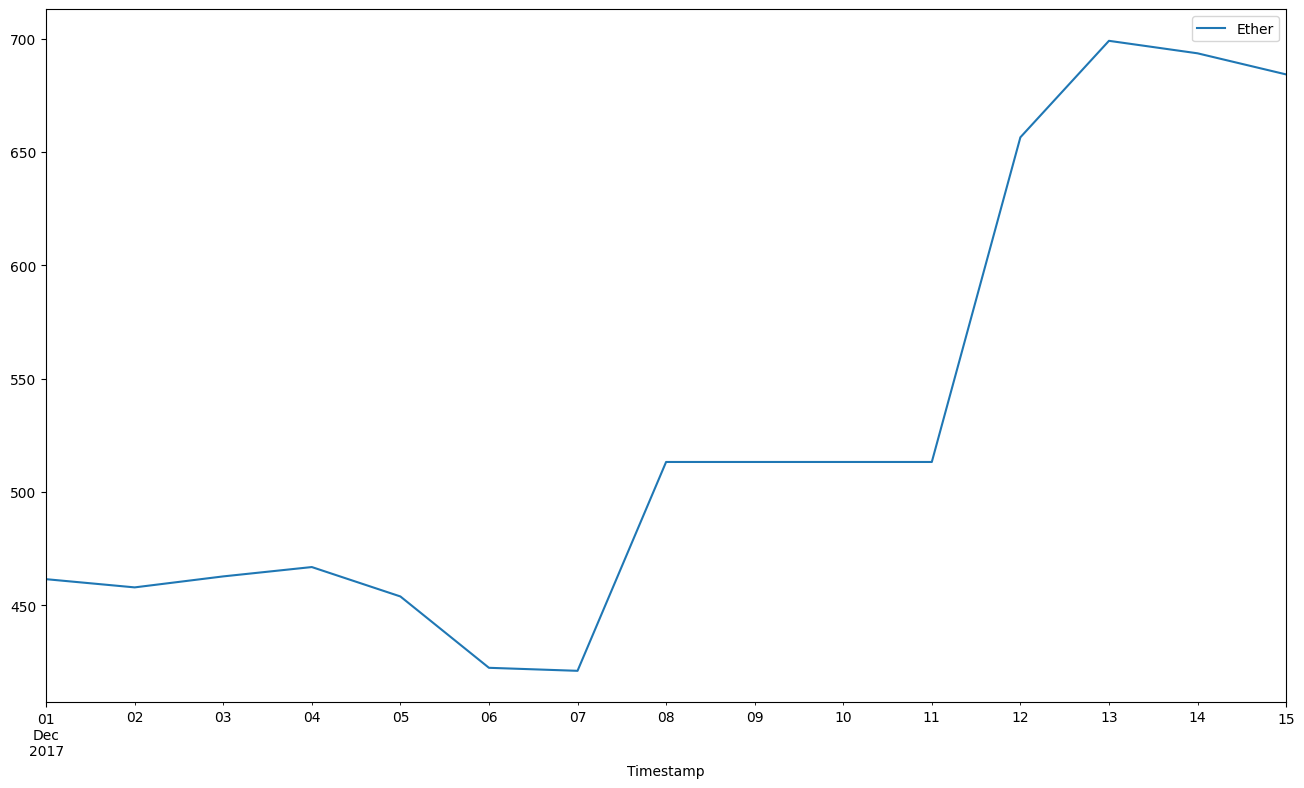

In [34]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))